## 目标
回测香农的网格交易投资方法。方法：设定有一笔资金，在投资标的的中位买入一半资金。然后每个调整周期，将改标的的盈余收割；亏损则补齐。
最佳操作时机为底部震荡时期。
### 步骤
- 获取易方达创业板etf(159915)，国航（601111）近3年的行情数据。
- 设定资金池和买入时间，调整梯度为2%
   - 买入一半资金
   - 基于上次交易价格，每上升2%，卖出2%
   - 基于上次交易价格，每下降2%，买入2%
- 运行一年，两年，三年，查看收益曲线

### 更进一步
交易自动化

In [12]:
#获取数据
import tushare as ts

pro = ts.pro_api('9e3a59b09f545f8d01026a709e544943bca739a35012c3bbbe961c5c')
df_601111 = pro.daily(ts_code='601111.SH', start_date='20161231', end_date='20191231')
df_601111

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,601111.SH,20191231,9.47,9.80,9.40,9.69,9.53,0.16,1.6789,643873.60,621069.578
1,601111.SH,20191230,9.39,9.71,9.39,9.53,9.39,0.14,1.4909,653836.40,626360.876
2,601111.SH,20191227,9.13,9.50,9.10,9.39,9.16,0.23,2.5109,758662.67,711125.062
3,601111.SH,20191226,9.15,9.19,9.03,9.16,9.11,0.05,0.5488,246358.21,224294.787
4,601111.SH,20191225,8.95,9.16,8.94,9.11,8.97,0.14,1.5608,351170.53,318528.651
5,601111.SH,20191224,8.94,8.99,8.85,8.97,9.00,-0.03,-0.3333,226224.24,201647.969
6,601111.SH,20191223,9.04,9.10,8.88,9.00,9.10,-0.10,-1.0989,355447.13,318595.626
7,601111.SH,20191220,9.14,9.19,9.04,9.10,9.09,0.01,0.1100,251679.95,228913.027
8,601111.SH,20191219,9.03,9.24,9.01,9.09,9.00,0.09,1.0000,359200.14,327627.023
9,601111.SH,20191218,9.16,9.17,8.98,9.00,9.10,-0.10,-1.0989,388042.88,351337.226


In [39]:
df_159915 = pro.daily(ts_code='159915.SZ', start_date='20161231', end_date='20191231')
df_159915

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount


In [36]:
#绘制K线图

from matplotlib.pylab import date2num
import datetime
 
# 对tushare获取到的数据转换成candlestick_ohlc()方法可读取的格式
df=df_601111
data_list = []
for row in df.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(row[1][1],'%Y%m%d')
    t = date2num(date_time)
    open,high,low,close = row[1][2:6]
    datas = (t,open,high,low,close)
    data_list.append(datas)
 


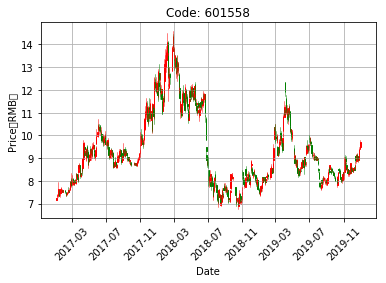

In [35]:
# 创建子图
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
# 设置X轴刻度为日期时间
ax.xaxis_date()
plt.xticks(rotation=45)
plt.yticks()
plt.title("Code: 601558")
plt.xlabel("Date")
plt.ylabel("Price（RMB）")
mpf.candlestick_ohlc(ax,data_list,width=1.5,colorup='r',colordown='green')
plt.grid()

In [ ]:
#